# Importing libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Some dataset characteristics

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [4]:
diamonds=pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.shape

(53940, 11)

In [6]:
diamonds[diamonds.price==max(diamonds.price)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
27749,27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [7]:
diamonds.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [9]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [10]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
diamonds[diamonds.duplicated()]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


# Data preprocessing

In [12]:
# Putting target variable 'price' to the end of the dataset

temp=diamonds.price
diamonds.drop(['price'],axis=1,inplace=True)
diamonds['price']=temp
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [13]:
diamonds.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [14]:
diamonds.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table     x     y     z  price
0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50   2757
53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61   2757
53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56   2757
53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74   2757
53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64   2757

[53940 rows x 10 columns]>

In [15]:
#Dropping diamonds that don't have any dimensions

diamonds.drop(diamonds[diamonds['x']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['z']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['y']==0].index,inplace=True)

In [16]:
diamonds.shape

(53920, 10)

# Data visualization

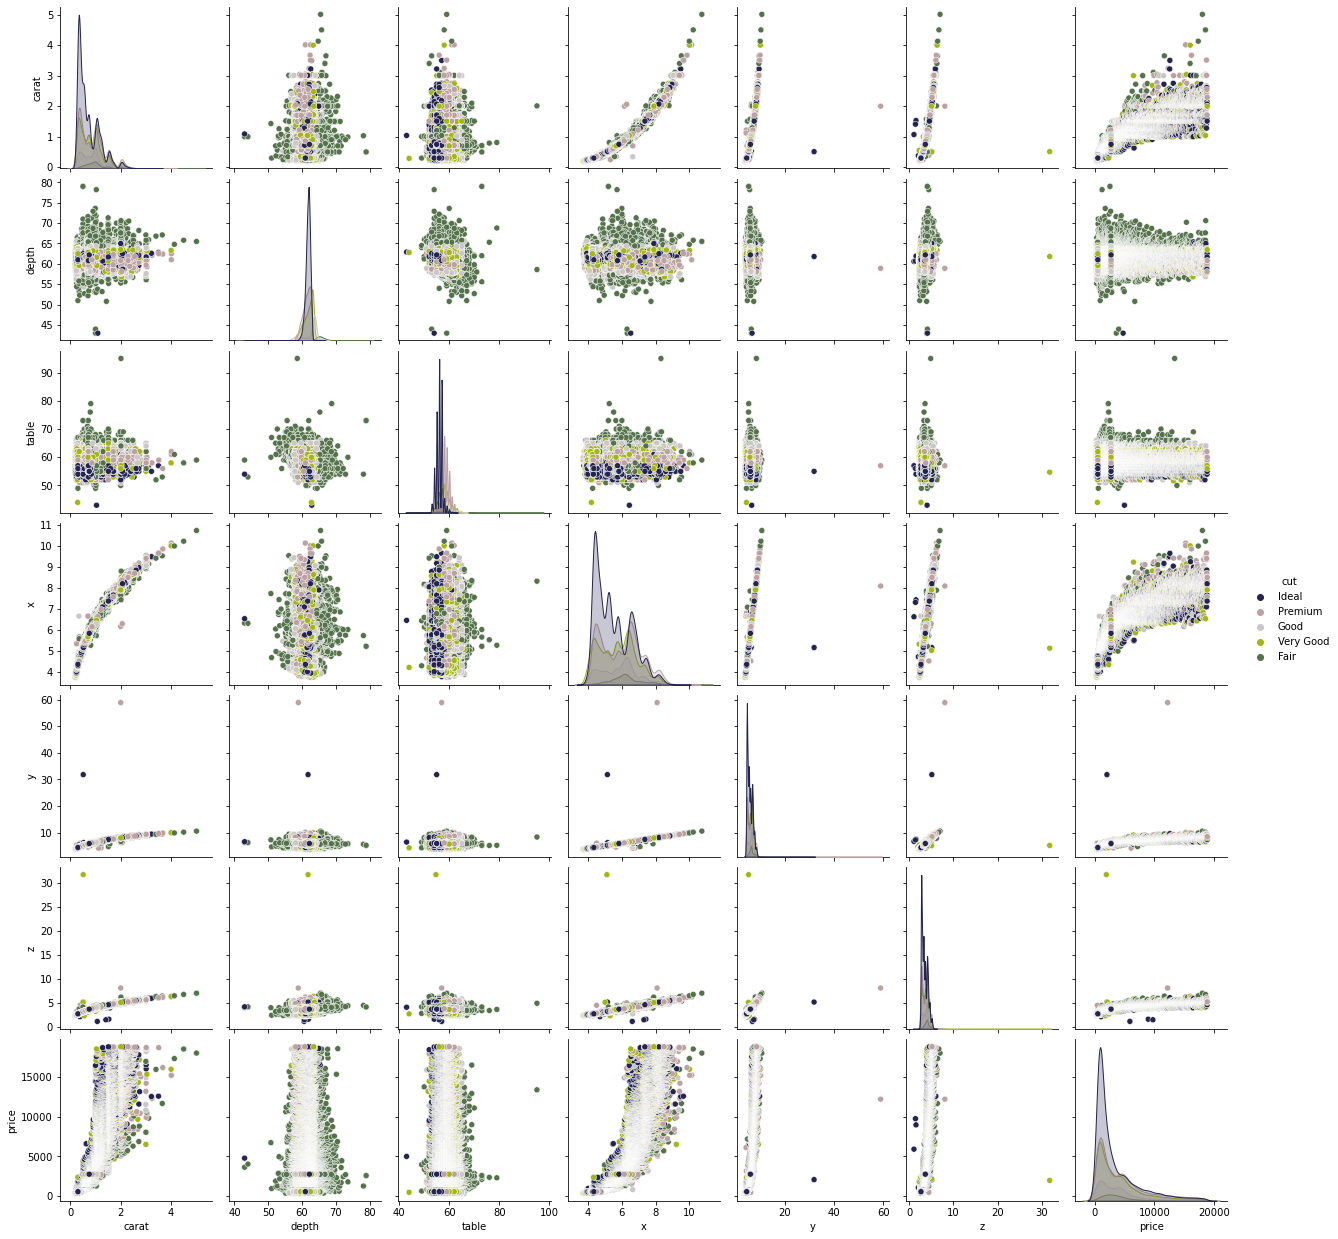

In [17]:
shade = ["#232451", "#bba1a0", "#cac7c6", 
         "#a2b710", "#55734b"]#shades for hue
ax = sns.pairplot(diamonds, 
                  hue= "cut",palette=shade)

<AxesSubplot:>

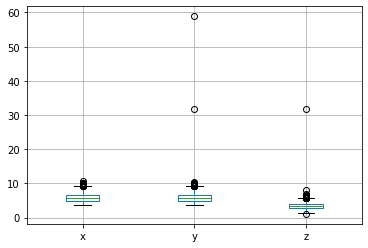

In [18]:
diamonds.boxplot(['x','y','z'])

<AxesSubplot:>

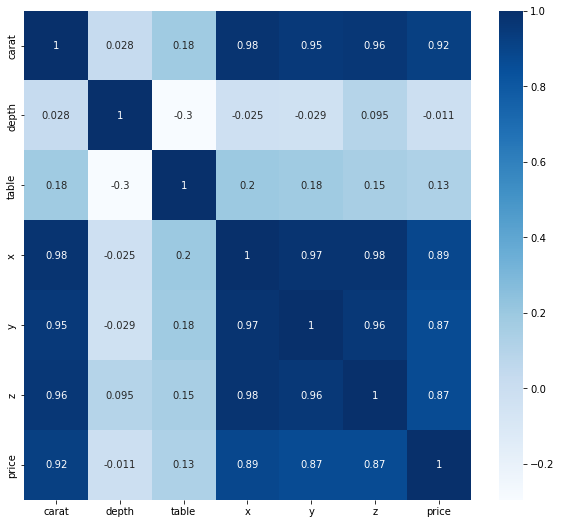

In [19]:
plt.figure(figsize=(10,9))
sns.heatmap(diamonds.corr(),annot=True,cmap='Blues')

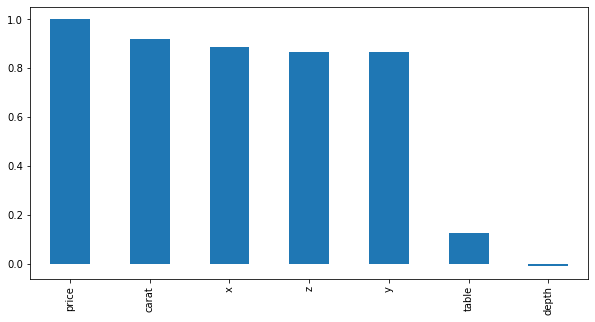

In [20]:
corr_mat = diamonds.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

In [21]:
input_cat_columns = diamonds.select_dtypes(include = ['object']).columns.tolist()
input_cat_columns

['cut', 'color', 'clarity']

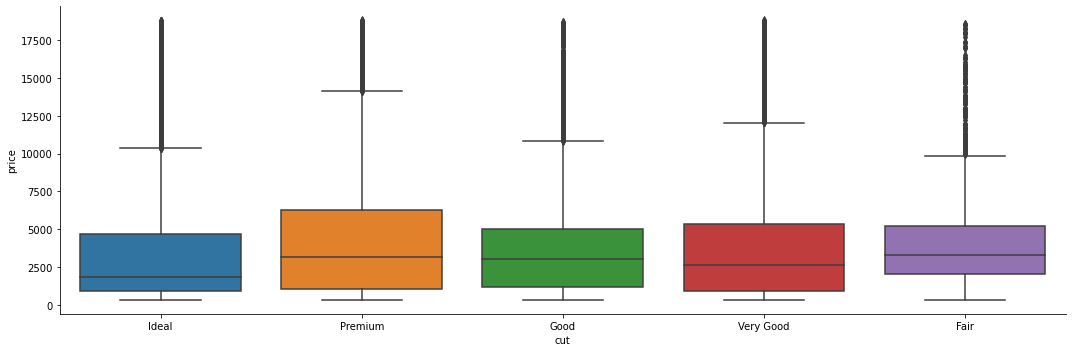

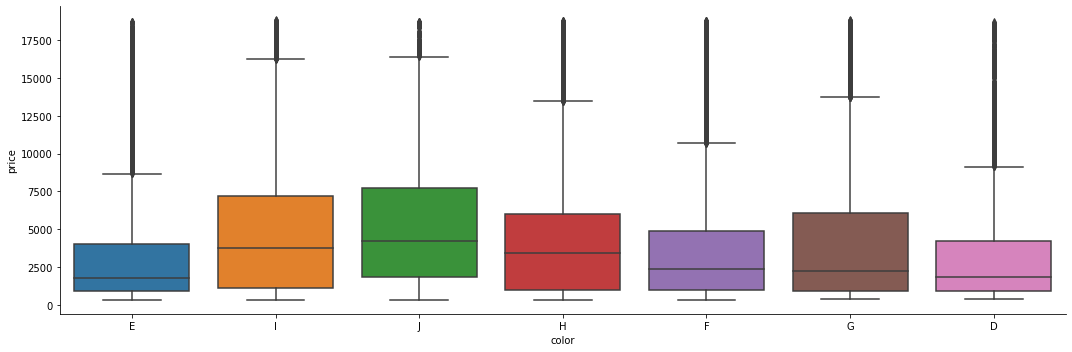

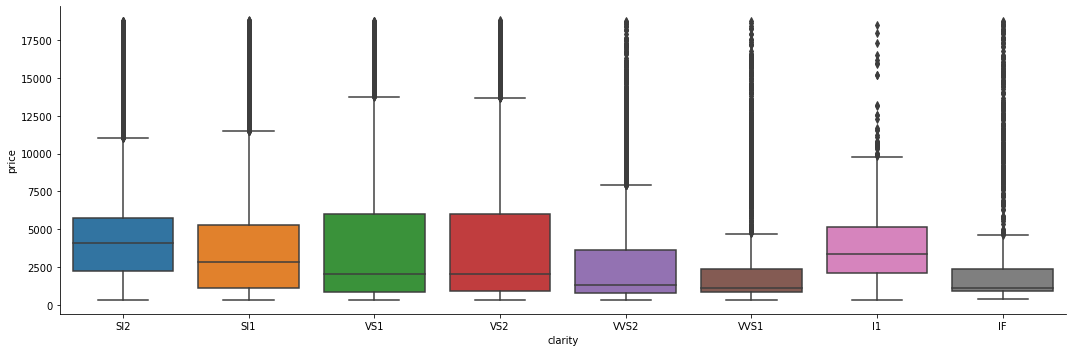

In [22]:
for col in input_cat_columns:
    sns.catplot(x=col, y="price",kind="box", dodge=False, height = 5, aspect = 3,data=diamonds)

In [23]:
diamonds.price.describe()

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

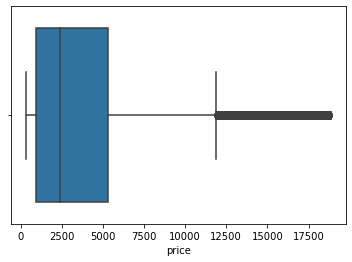

In [24]:
sns.boxplot(diamonds.price)

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

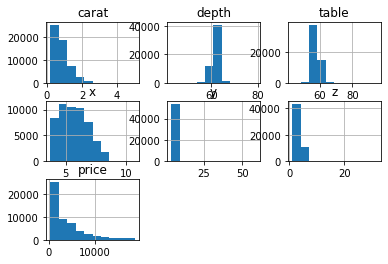

In [25]:
diamonds.hist()

In [26]:
diamonds.clarity.value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

# Without Hyperparameter tuning

## OneHotEncoding

In [27]:
# OneHotEncoded columns

df=pd.get_dummies(diamonds,columns=['cut','color','clarity'])
df

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2757,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,2757,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,2757,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,2757,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
# Putting target variable 'price' to the end of the dataset

temp=df.price
df.drop(['price'],axis=1,inplace=True)
df['price']=temp
df.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,1,0,0,0,1,0,0,0,0,335


### Binning by equal data points

In [29]:
# Binning done by equal data points range

df['price']=pd.qcut(diamonds.price,q=10,labels=[m for m in range(10)])
df.sort_values(by=['price'])

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12373,0.40,62.8,55.0,4.70,4.73,2.96,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12372,0.40,62.0,57.0,4.70,4.72,2.92,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12371,0.40,62.5,53.0,4.71,4.76,2.96,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12370,0.26,60.7,56.0,4.13,4.17,2.52,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23753,1.27,61.3,60.0,6.90,6.99,4.26,0,0,0,1,...,0,0,0,0,0,0,0,0,1,9
23752,1.60,62.1,60.0,7.51,7.44,4.64,0,0,0,1,...,0,0,0,0,0,0,1,0,0,9
23751,1.77,63.1,57.0,7.68,7.63,4.83,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9
23759,1.71,61.9,57.0,7.69,7.65,4.75,0,0,1,0,...,0,0,0,0,1,0,0,0,0,9


After this go directly to 'Splitting data into training and testing sets'. Don't execute the cells before that.

### Binning done by equal price range

In [30]:
# Binning done by equal price range

df['price'] = pd.cut(diamonds.price,bins=10,labels=[m for m in range(10)])
df.sort_values(by=['price'])

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
19352,0.30,62.2,57.0,4.26,4.32,2.67,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
19351,0.31,61.8,56.0,4.35,4.37,2.69,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
19350,0.30,60.7,57.0,4.36,4.41,2.66,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36544,0.40,62.6,59.0,4.74,4.68,2.95,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,2.02,57.9,63.0,8.13,8.21,4.73,0,1,0,0,...,0,0,0,0,0,1,0,0,0,9
27209,2.36,60.1,59.0,8.64,8.69,5.21,0,0,1,0,...,1,0,0,0,0,0,1,0,0,9
27210,2.00,62.9,56.0,7.94,8.01,5.02,0,0,1,0,...,0,0,0,0,1,0,0,0,0,9
27212,2.29,61.6,60.0,8.45,8.43,5.20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,9


After this go directly to 'Splitting data into training and testing sets'

## LabelEncoding

In [31]:
le=LabelEncoder()
df=diamonds.copy()
df[['cut','color','clarity']]=df[['cut','color','clarity']].apply(le.fit_transform)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


### Binning by equal number of data points

In [32]:
# Binning done by equal data points range

df['price']=pd.qcut(diamonds.price,q=10,labels=[m for m in range(10)])
df.sort_values(by=['price'])

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,0
12373,0.40,2,2,3,62.8,55.0,4.70,4.73,2.96,0
12372,0.40,2,2,3,62.0,57.0,4.70,4.72,2.92,0
12371,0.40,2,2,3,62.5,53.0,4.71,4.76,2.96,0
12370,0.26,2,1,7,60.7,56.0,4.13,4.17,2.52,0
...,...,...,...,...,...,...,...,...,...,...
23753,1.27,3,2,7,61.3,60.0,6.90,6.99,4.26,9
23752,1.60,3,4,5,62.1,60.0,7.51,7.44,4.64,9
23751,1.77,4,3,2,63.1,57.0,7.68,7.63,4.83,9
23759,1.71,2,1,3,61.9,57.0,7.69,7.65,4.75,9


After this go directly to 'Splitting data into training and testing sets'. Don't execute the cells before that.

### Binning by equal price range

In [33]:
# Binning done by equal price range

df['price'] = pd.cut(diamonds.price,bins=10,labels=[m for m in range(10)])
df.sort_values(by=['price'])

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,0
19352,0.30,2,1,5,62.2,57.0,4.26,4.32,2.67,0
19351,0.31,2,1,5,61.8,56.0,4.35,4.37,2.69,0
19350,0.30,2,1,7,60.7,57.0,4.36,4.41,2.66,0
36544,0.40,3,2,2,62.6,59.0,4.74,4.68,2.95,0
...,...,...,...,...,...,...,...,...,...,...
27208,2.02,1,5,4,57.9,63.0,8.13,8.21,4.73,9
27209,2.36,2,6,5,60.1,59.0,8.64,8.69,5.21,9
27210,2.00,2,2,3,62.9,56.0,7.94,8.01,5.02,9
27212,2.29,3,4,5,61.6,60.0,8.45,8.43,5.20,9


After this go directly to 'Splitting data into training and testing sets'. Don't execute the cells before that.

In [34]:
diamonds[diamonds.price>9819]

,carat,cut,color,clarity,depth,table,x,y,z,price
21751,1.12,Very Good,G,IF,61.0,58.0,6.70,6.72,4.09,9820
21752,1.12,Ideal,G,VVS2,61.6,55.0,6.68,6.74,4.13,9820
21753,1.50,Premium,H,SI1,61.0,60.0,7.33,7.27,4.45,9820
21754,1.51,Good,H,VS2,64.0,59.0,7.19,7.25,4.62,9821
21755,1.51,Very Good,H,VS2,62.3,61.0,7.27,7.30,4.54,9821
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,7.95,8.00,5.01,18803
27746,2.07,Ideal,G,SI2,62.5,55.0,8.20,8.13,5.11,18804
27747,1.51,Ideal,G,IF,61.7,55.0,7.37,7.41,4.56,18806
27748,2.00,Very Good,G,SI1,63.5,56.0,7.90,7.97,5.04,18818


In [35]:
diamonds.sort_values(by=['price']).head(5392)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
26711,0.32,Premium,F,VS2,62.1,59.0,4.35,4.41,2.72,645
26708,0.32,Ideal,F,VS2,62.4,55.0,4.41,4.43,2.76,645
27369,0.28,Ideal,E,VVS2,60.3,57.0,4.21,4.25,2.55,646
27054,0.35,Ideal,H,VS1,61.8,57.0,4.53,4.56,2.81,646


## Splitting data into training and testing sets

In [36]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [37]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=190,test_size=0.2,shuffle=True)

## Various classification algorithms

In [38]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X,train_Y)
predi=knn.predict(test_X)
accuracy_score(predi,test_Y)

0.7927485163204748

In [39]:
gnb=GaussianNB()
gnb.fit(train_X,train_Y)
predi=gnb.predict(test_X)
accuracy_score(predi,test_Y)

0.7091988130563798

In [60]:
dt=DecisionTreeClassifier()
dt.fit(train_X,train_Y)
predi=dt.predict(test_X)
accuracy_score(predi,test_Y)

0.8458827893175074

In [80]:
xgboost=XGBClassifier()
xgboost.fit(train_X,train_Y)
predi=xgboost.predict(test_X)
accuracy_score(predi,test_Y)

0.8707344213649851

In [42]:
randomforest=RandomForestClassifier()
randomforest.fit(train_X,train_Y)
predi=randomforest.predict(test_X)
accuracy_score(predi,test_Y)

0.8742581602373887

In [43]:
gradientboosting=GradientBoostingClassifier()
gradientboosting.fit(train_X,train_Y)
predi=gradientboosting.predict(test_X)
accuracy_score(predi,test_Y)

0.8404117210682492

In [44]:
adaboost=AdaBoostClassifier()
adaboost.fit(train_X,train_Y)
predi=adaboost.predict(test_X)
accuracy_score(predi,test_Y)

0.6057121661721068

In [45]:
svm=SVC()
svm.fit(train_X,train_Y)
predi=svm.predict(test_X)
accuracy_score(predi,test_Y)

0.6938983679525222

In [46]:
lr=LogisticRegression()
lr.fit(train_X,train_Y)
predi=lr.predict(test_X)
accuracy_score(predi,test_Y)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7063241839762612

# With Hyperparameter tuning

In [47]:
# Creating a function for predictions
def predict(model):
    model.fit(train_X, train_Y)
    y_predict = model.predict(test_X)
    print('Accuracy: %.2f%%' % (accuracy_score(test_Y, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(test_Y, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(test_Y, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(test_Y, y_predict) * 100))
    confusion_matrix_model = confusion_matrix(test_Y, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

In [48]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [3, None],
			"max_features": randint(1, 9),
			"min_samples_leaf": randint(1, 9),
			"criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(train_X, train_Y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8}
Best score is 0.8461841990077726


In [75]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_Model = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

rf_Grid.fit(train_X, train_Y)
rf_Grid.best_params_
print("Best score is {}".format(rf_Grid.best_score_))

from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_RandomGrid.fit(train_X, train_Y)

rf_Grid.best_params_

print("Best score is {}".format(rf_RandomGrid.best_score_))



Fitting 10 folds for each of 320 candidates, totalling 3200 fits
Best score is 0.736994752632471
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best score is 0.729529682501856


In [76]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [77]:
rf_RandomGrid.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [81]:
# Tuning XGBoost Classifier
import warnings
warnings.filterwarnings('ignore')
grid3 = {'n_estimators': [100,150,200,250,300,350,400,450,500],
              'learning_rate': [0.01, 0.5,0.2, 1.0],
              'subsample': [0.3,0.5, 0.6,0.8,1.0],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.2,0.5, 0.4,0.8,1.0],
              'min_child_weight': [1, 2, 3, 4]}
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
#              'max_depth': [7,10,15,20],
        #      'min_child_weight': [10,15,20,25],
#              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5]
#              "gamma"       : [1,2,3]
                }
xgb = RandomizedSearchCV(XGBClassifier(),
                             param_distributions = parameters,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
xgb.fit(train_X, train_Y)
print("Tuned Decision Tree Parameters: {}".format(xgb.best_params_))
print("Best score is {}".format(xgb.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Tuned Decision Tree Parameters: {'reg_lambda': 3, 'reg_alpha': 0.2, 'objective': 'reg:squarederror', 'n_estimators': 500, 'learning_rate': 0.1, 'booster': 'gblinear'}
Best score is nan


In [82]:
xgboost=XGBClassifier(reg_lambda=5, reg_alpha=1, objective='reg:squarederror', n_estimators=500, learning_rate=0.1, booster='gblinear')
xgboost.fit(train_X,train_Y)
predi=xgboost.predict(test_X)
accuracy_score(predi,test_Y)

0.46726632047477745